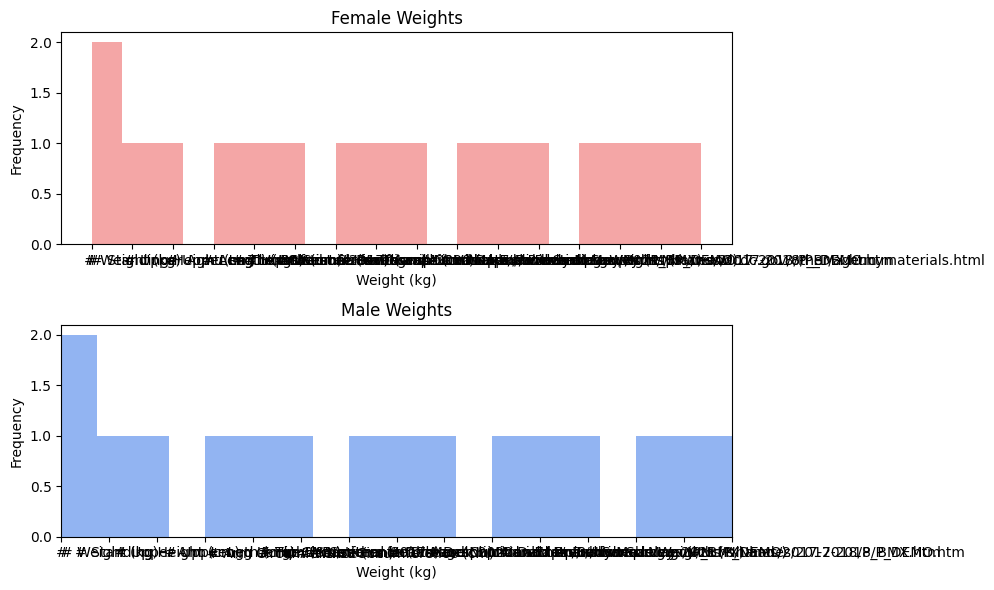

C:\Users\mukhi\AppData\Local\Temp\ipykernel_15436\1595274212.py:50: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

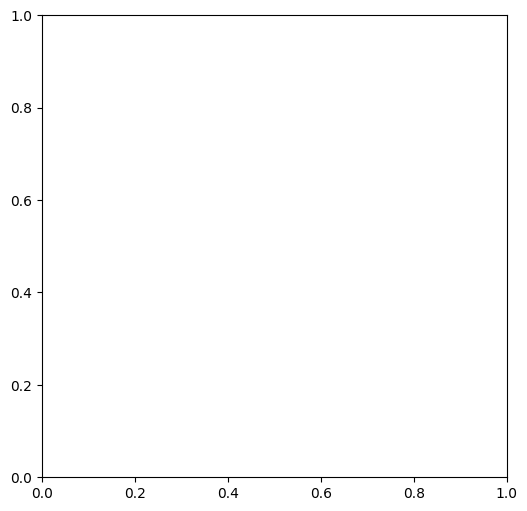

In [1]:
# Capstone Project: Working with Numpy Matrices (Multidimensional Data)

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore, pearsonr, spearmanr

# 1. Loading Data: Reading CSV files and converting them to NumPy matrices
# Handle bad lines and delimiter explicitly
male_df = pd.read_csv('nhanes_adult_male_bmx_2020.csv', delimiter=',', on_bad_lines='skip')
female_df = pd.read_csv('nhanes_adult_female_bmx_2020.csv', delimiter=',', on_bad_lines='skip')

# Convert DataFrames to NumPy arrays
male = male_df.values
female = female_df.values

# 2. Extracting weights for both male and female participants
male_weights = male[:, 0]  # First column is weight
female_weights = female[:, 0]

# 3. Plotting histograms of male and female weights using subplots

# Create subplots for male and female weight histograms
plt.figure(figsize=(10, 6))

# Female weights histogram
plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=20, color='lightcoral', alpha=0.7)
plt.title('Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Male weights histogram
plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=20, color='cornflowerblue', alpha=0.7)
plt.title('Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Make x-axis limits identical for both plots
plt.xlim(min(female_weights.min(), male_weights.min()), max(female_weights.max(), male_weights.max()))
plt.tight_layout()
plt.show()

# 4. Box-and-whisker plot comparing male and female weights

# Create a boxplot to compare the distributions of male and female weights
plt.figure(figsize=(6, 6))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'])
plt.title('Comparison of Male and Female Weights')
plt.ylabel('Weight (kg)')
plt.show()

# 5. Basic numerical aggregates (measures of location, dispersion, and shape)

def describe_weights(weights, gender):
    print(f"{gender} Weights - Summary Statistics:")
    print(f"Mean: {np.mean(weights):.2f}")
    print(f"Median: {np.median(weights):.2f}")
    print(f"Standard Deviation: {np.std(weights):.2f}")
    print(f"Variance: {np.var(weights):.2f}")
    print(f"Minimum: {np.min(weights):.2f}")
    print(f"Maximum: {np.max(weights):.2f}")
    print(f"Skewness: {pd.Series(weights).skew():.2f}")
    print(f"Kurtosis: {pd.Series(weights).kurtosis():.2f}\n")

# Compute and describe the basic aggregates for male and female weights
describe_weights(female_weights, 'Female')
describe_weights(male_weights, 'Male')

# 6. Adding BMI to the female dataset

# Calculate BMI = weight (kg) / (height (m))^2
female_bmi = female[:, 0] / (female[:, 1] / 100) ** 2  # weight / height^2
female = np.hstack((female, female_bmi.reshape(-1, 1)))  # Add BMI as the 8th column

# 7. Standardising the female dataset (z-scores)

# Compute z-scores for each column of the female dataset
zfemale = zscore(female, axis=0)

# 8. Scatterplot matrix for standardised weight, height, waist, hip, and BMI

# Extract relevant columns: height (1), weight (0), waist (6), hip (5), BMI (7)
selected_columns = zfemale[:, [1, 0, 6, 5, 7]]

# Pairplot-like scatter matrix
pd.plotting.scatter_matrix(pd.DataFrame(selected_columns, columns=['Height', 'Weight', 'Waist', 'Hip', 'BMI']),
                           alpha=0.8, figsize=(12, 8), diagonal='hist')
plt.suptitle('Scatterplot Matrix of Standardised Female Measurements', y=1.02)
plt.show()

# 9. Compute Pearson and Spearman correlations for the selected variables

# Compute correlation coefficients
variables = ['Height', 'Weight', 'Waist', 'Hip', 'BMI']
for i in range(selected_columns.shape[1]):
    for j in range(i+1, selected_columns.shape[1]):
        pearson_corr = pearsonr(selected_columns[:, i], selected_columns[:, j])[0]
        spearman_corr = spearmanr(selected_columns[:, i], selected_columns[:, j])[0]
        print(f'Pearson correlation ({variables[i]} vs {variables[j]}): {pearson_corr:.2f}')
        print(f'Spearman correlation ({variables[i]} vs {variables[j]}): {spearman_corr:.2f}\n')

# 10. Adding waist-to-height and waist-to-hip ratios for males and females

# Waist-to-height ratio: waist (6) / height (1)
male_waist_height_ratio = male[:, 6] / male[:, 1]
female_waist_height_ratio = female[:, 6] / female[:, 1]

# Waist-to-hip ratio: waist (6) / hip (5)
male_waist_hip_ratio = male[:, 6] / male[:, 5]
female_waist_hip_ratio = female[:, 6] / female[:, 5]

# Add these columns to the matrices
male = np.hstack((male, male_waist_height_ratio.reshape(-1, 1), male_waist_hip_ratio.reshape(-1, 1)))
female = np.hstack((female, female_waist_height_ratio.reshape(-1, 1), female_waist_hip_ratio.reshape(-1, 1)))

# 11. Boxplot comparing waist-to-height and waist-to-hip ratios for males and females

# Create boxplot comparing waist-to-height and waist-to-hip ratios
plt.figure(figsize=(10, 6))
plt.boxplot([female[:, 8], male[:, 8], female[:, 9], male[:, 9]],
            labels=['Female Waist/Height', 'Male Waist/Height', 'Female Waist/Hip', 'Male Waist/Hip'])
plt.title('Comparison of Waist-to-Height and Waist-to-Hip Ratios')
plt.ylabel('Ratio')
plt.show()

# 12. Printing the standardised body measurements of the 5 people with lowest and highest BMIs

# Sort by BMI (7th column in zfemale)
lowest_bmi_indices = np.argsort(zfemale[:, 7])[:5]  # Lowest 5 BMIs
highest_bmi_indices = np.argsort(zfemale[:, 7])[-5:]  # Highest 5 BMIs

# Print standardised body measurements for these participants
print("Standardised Measurements of 5 People with Lowest BMIs:")
print(zfemale[lowest_bmi_indices, :])

print("\nStandardised Measurements of 5 People with Highest BMIs:")
print(zfemale[highest_bmi_indices, :])
